## Data Mining Final Project
### Pattern Mining and Predictive analytics using the Diabetes dataset
#### Jude Ogbuibe & Pooja Bansal
##### May 6, 2018

Below is the summary of the process we undertook as well as the code used to generate our analysis.

#### Step 1: Prelimnary Data Cleaning and Transformation

These processes were carried out with the aim of:
* Dealing with missing information
* Encode data in the required form to aid our analysis

In [3]:
## Load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
## Load data into dataframe

dataset = pd.read_csv('diabetic_data.csv')

In [8]:
# Replace '?' with NAN and check for nulls

dataset.replace('?', np.nan, inplace = True)
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [10]:
## Exclude Weight, Medical Specialty and Paycode due to missing values

dataset.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1, inplace =True)

In [11]:
## Encode Missing values in Race with Unknown

dataset['race'].fillna('Unknown', inplace = True)

In [13]:
## Encode Diagnosis details based on details provided in Paper

import math
def getencoding(value):
    '''
    0: Diabetese
    1: Circulatory
    2: Respiratory
    3: Digestive
    4: Injury
    5: Muskuloskeletal
    6: Genitourinary
    7: Neoplasms
    8: Others
    '''
    #result = 8
    if (str.isalpha(str(value)[0])):
        return 8
    else:
        if math.floor(float(value)) == 250:
            return 0
        if ((float(value)) >= 390 and float(value) <= 459) or float(value) == 785:
            return 1
        if (float(value) >= 460 and float(value) <= 519) or float(value) == 786:
            return 2
        if (float(value) >= 520 and float(value) <= 579) or float(value) == 787:
            return 3
        if (float(value) >= 800 and float(value) <= 999):
            return 4
        if (float(value) >= 710 and float(value) <= 739):
            return 5
        if (float(value) >= 580 and float(value) <= 629) or float(value) == 788:
            return 6
        if (float(value) >= 140 and float(value) <= 239) or (float(value) >= 790 and float(value) <= 799) \
        or (float(value) >= 240 and float(value) <= 249) or (float(value) >= 251 and float(value) <= 271) \
        or (float(value) >= 680 and float(value) <= 709) or (float(value) >= 1 and float(value) <= 139) \
        or (float(value) >= 780 and float(value) <= 782):
            return 7
        if (float(value) >= 290 and float(value) <= 319) or (float(value) >= 280 and float(value) <= 289)\
        or (float(value) >= 320 and float(value) <= 389) or (float(value) >= 630 and float(value) <= 679) \
        or (float(value) >= 740 and float(value) <= 759):
            return 8
        else:
            return 8
        

dataset['diag_1'] = dataset['diag_1'].apply(getencoding)
dataset['diag_2'] = dataset['diag_2'].apply(getencoding)
dataset['diag_3'] = dataset['diag_3'].apply(getencoding)

In [15]:
## Drop duplicates based to ensure each entry corresponds to a single patient

dataset.drop_duplicates('patient_nbr', inplace = True)

In [16]:
## remove patients who expired to prevent
dataset =  dataset[(dataset['discharge_disposition_id'] != 19) | (dataset['discharge_disposition_id'] != 11) | \
                   (dataset['discharge_disposition_id'] != 21) | (dataset['discharge_disposition_id'] != 20)]

In [19]:
## Further exclude Non-significant attributes encounter_id

dataset.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [24]:
## Review attribute datatypes

dataset[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']] = dataset[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']].astype(object, inplace = True)

In [27]:
## Space after prelimnary data cleaning and transformation
dataset.shape

(71518, 45)

#### Step 2: Exploratory data analysis and data description

Here we attempt to get more insight into our data by understanding the not obvious statistical elements.

In [28]:
## Describe The numerical attributes of the dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,71518.0,4.289130,2.949210,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,71518.0,43.075478,19.952338,1.0,31.0,44.0,57.0,132.0
num_procedures,71518.0,1.430577,1.759864,0.0,0.0,1.0,2.0,6.0
num_medications,71518.0,15.705025,8.311163,1.0,10.0,14.0,20.0,81.0
number_outpatient,71518.0,0.280069,1.068957,0.0,0.0,0.0,0.0,42.0
number_emergency,71518.0,0.103540,0.509187,0.0,0.0,0.0,0.0,42.0
number_inpatient,71518.0,0.177829,0.603790,0.0,0.0,0.0,0.0,12.0
number_diagnoses,71518.0,7.245700,1.994674,1.0,6.0,8.0,9.0,16.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D83807EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019D84153278>]], dtype=object)

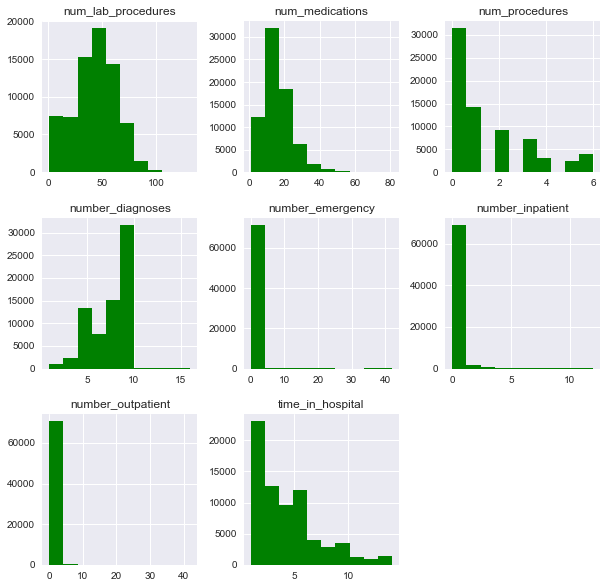

In [42]:
## Veiw the distributions 

dataset.select_dtypes(include = [np.number]).hist(figsize = [10, 10], bins = 10, color = 'green')

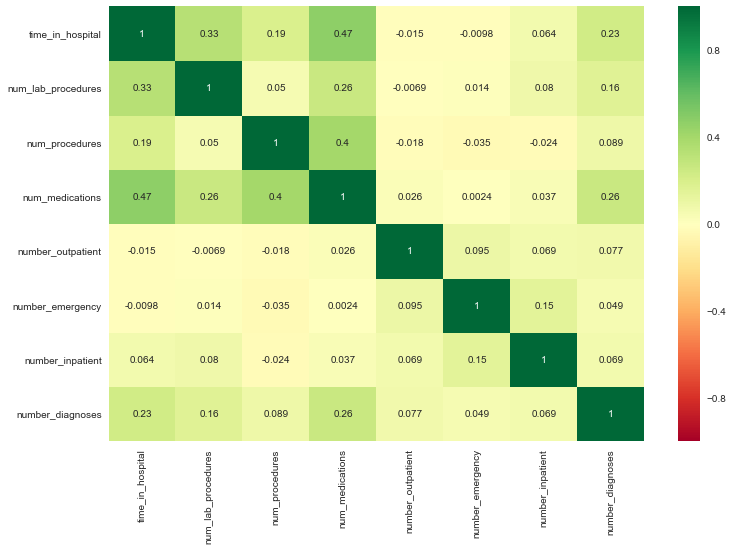

In [41]:
## Check for correlation between numeric attributes

sns.heatmap(dataset.select_dtypes(include = [np.number]).corr(),annot=True,cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(12,8)


No strong correlation between numeric attributes!

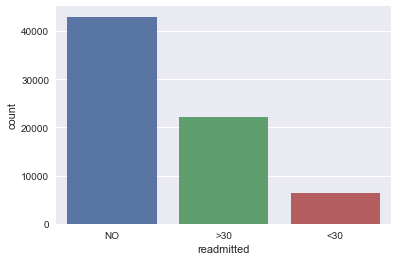

In [44]:
## Show count plot of categorical attributes.

sns.countplot(x='readmitted', data= dataset)

This reveals that the target variable has a imbalance skewed toward No readmission.

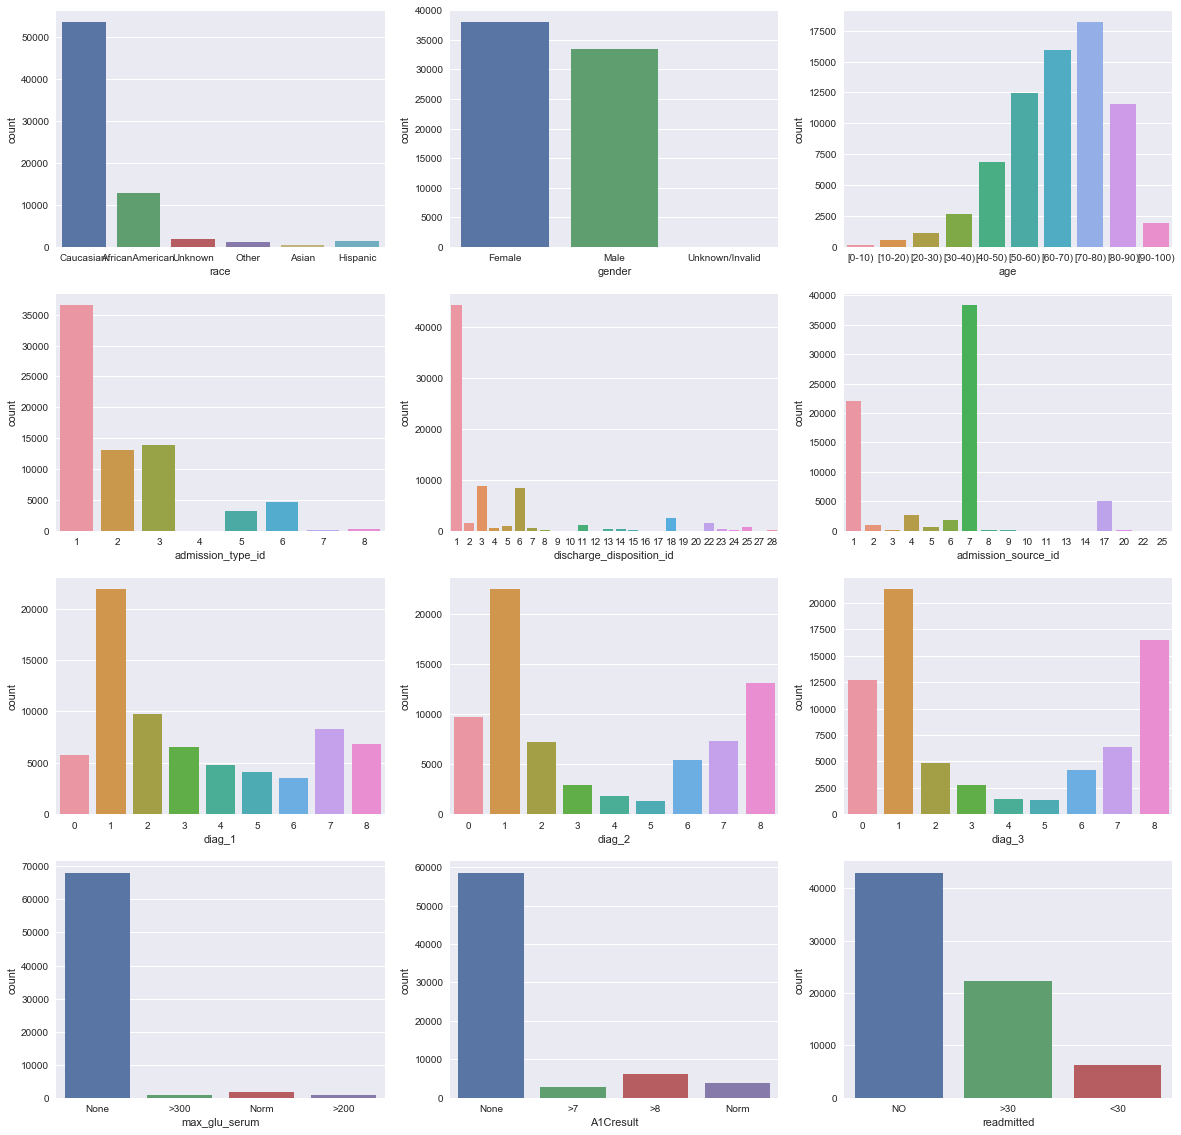

In [70]:
## Plot count plot of 

attribs = ['race', 'gender', 'age', 'admission_type_id','discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2','diag_3', 'max_glu_serum', 'A1Cresult','readmitted']
fig, ax = plt.subplots(nrows=4, ncols=3, figsize = [20,20])
for i,j in enumerate(attribs):
    sns.countplot(x = j, data = dataset, ax = ax[i//3][i%3])

Step 3: 